## データ分析

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import japanize_matplotlib
import seaborn as sns

import time

In [96]:
df_tmp = pd.read_csv('preprocessed_data.csv')
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 222923 entries, 0 to 222922
Data columns (total 16 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   カテゴリ    222923 non-null  object 
 1   建物名     222923 non-null  object 
 2   築年数     222923 non-null  int64  
 3   階数      222923 non-null  int64  
 4   階       222923 non-null  int64  
 5   賃料      222923 non-null  float64
 6   管理費     222923 non-null  float64
 7   敷金      222923 non-null  float64
 8   礼金      222923 non-null  float64
 9   間取り     222923 non-null  object 
 10  専有面積    222923 non-null  float64
 11  23区     222923 non-null  object 
 12  都市名     222923 non-null  object 
 13  路線      222923 non-null  object 
 14  最寄駅     222923 non-null  object 
 15  徒歩      222923 non-null  int64  
dtypes: float64(5), int64(4), object(7)
memory usage: 27.2+ MB


In [97]:
### カテゴリ変数に変換
def trans_cate(df):
    transed_df=df.copy()
    cols=['カテゴリ','間取り', '23区', '都市名', '路線', '最寄駅']
    
    for col in cols:
        transed_df[col]=transed_df[col].astype('category')
    return transed_df

_df=trans_cate(df_tmp)
_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 222923 entries, 0 to 222922
Data columns (total 16 columns):
 #   Column  Non-Null Count   Dtype   
---  ------  --------------   -----   
 0   カテゴリ    222923 non-null  category
 1   建物名     222923 non-null  object  
 2   築年数     222923 non-null  int64   
 3   階数      222923 non-null  int64   
 4   階       222923 non-null  int64   
 5   賃料      222923 non-null  float64 
 6   管理費     222923 non-null  float64 
 7   敷金      222923 non-null  float64 
 8   礼金      222923 non-null  float64 
 9   間取り     222923 non-null  category
 10  専有面積    222923 non-null  float64 
 11  23区     222923 non-null  category
 12  都市名     222923 non-null  category
 13  路線      222923 non-null  category
 14  最寄駅     222923 non-null  category
 15  徒歩      222923 non-null  int64   
dtypes: category(6), float64(5), int64(4), object(1)
memory usage: 18.8+ MB


In [98]:
df=_df.drop('建物名', axis=1)
df.head()

,カテゴリ,築年数,階数,階,賃料,管理費,敷金,礼金,間取り,専有面積,23区,都市名,路線,最寄駅,徒歩
0,賃貸アパート,4,2,2,148000.0,5000.0,148000.0,148000.0,42DK,48.87,大田区,南蒲田３,京急空港線,糀谷駅,7
1,賃貸一戸建て,10,3,3,195000.0,0.0,390000.0,195000.0,3SLDK,97.95,荒川区,荒川２,東京メトロ千代田線,町屋駅,5
2,賃貸一戸建て,10,3,3,195000.0,0.0,390000.0,195000.0,3SLDK,97.95,荒川区,荒川２,東京メトロ千代田線,町屋駅,5
3,賃貸マンション,5,11,2,152000.0,10000.0,152000.0,152000.0,2LDK,52.04,荒川区,東日暮里４,ＪＲ山手線,鶯谷駅,6
4,賃貸アパート,13,3,3,113000.0,2000.0,113000.0,113000.0,1LDK,43.81,荒川区,南千住５,東京メトロ日比谷線,三ノ輪駅,5


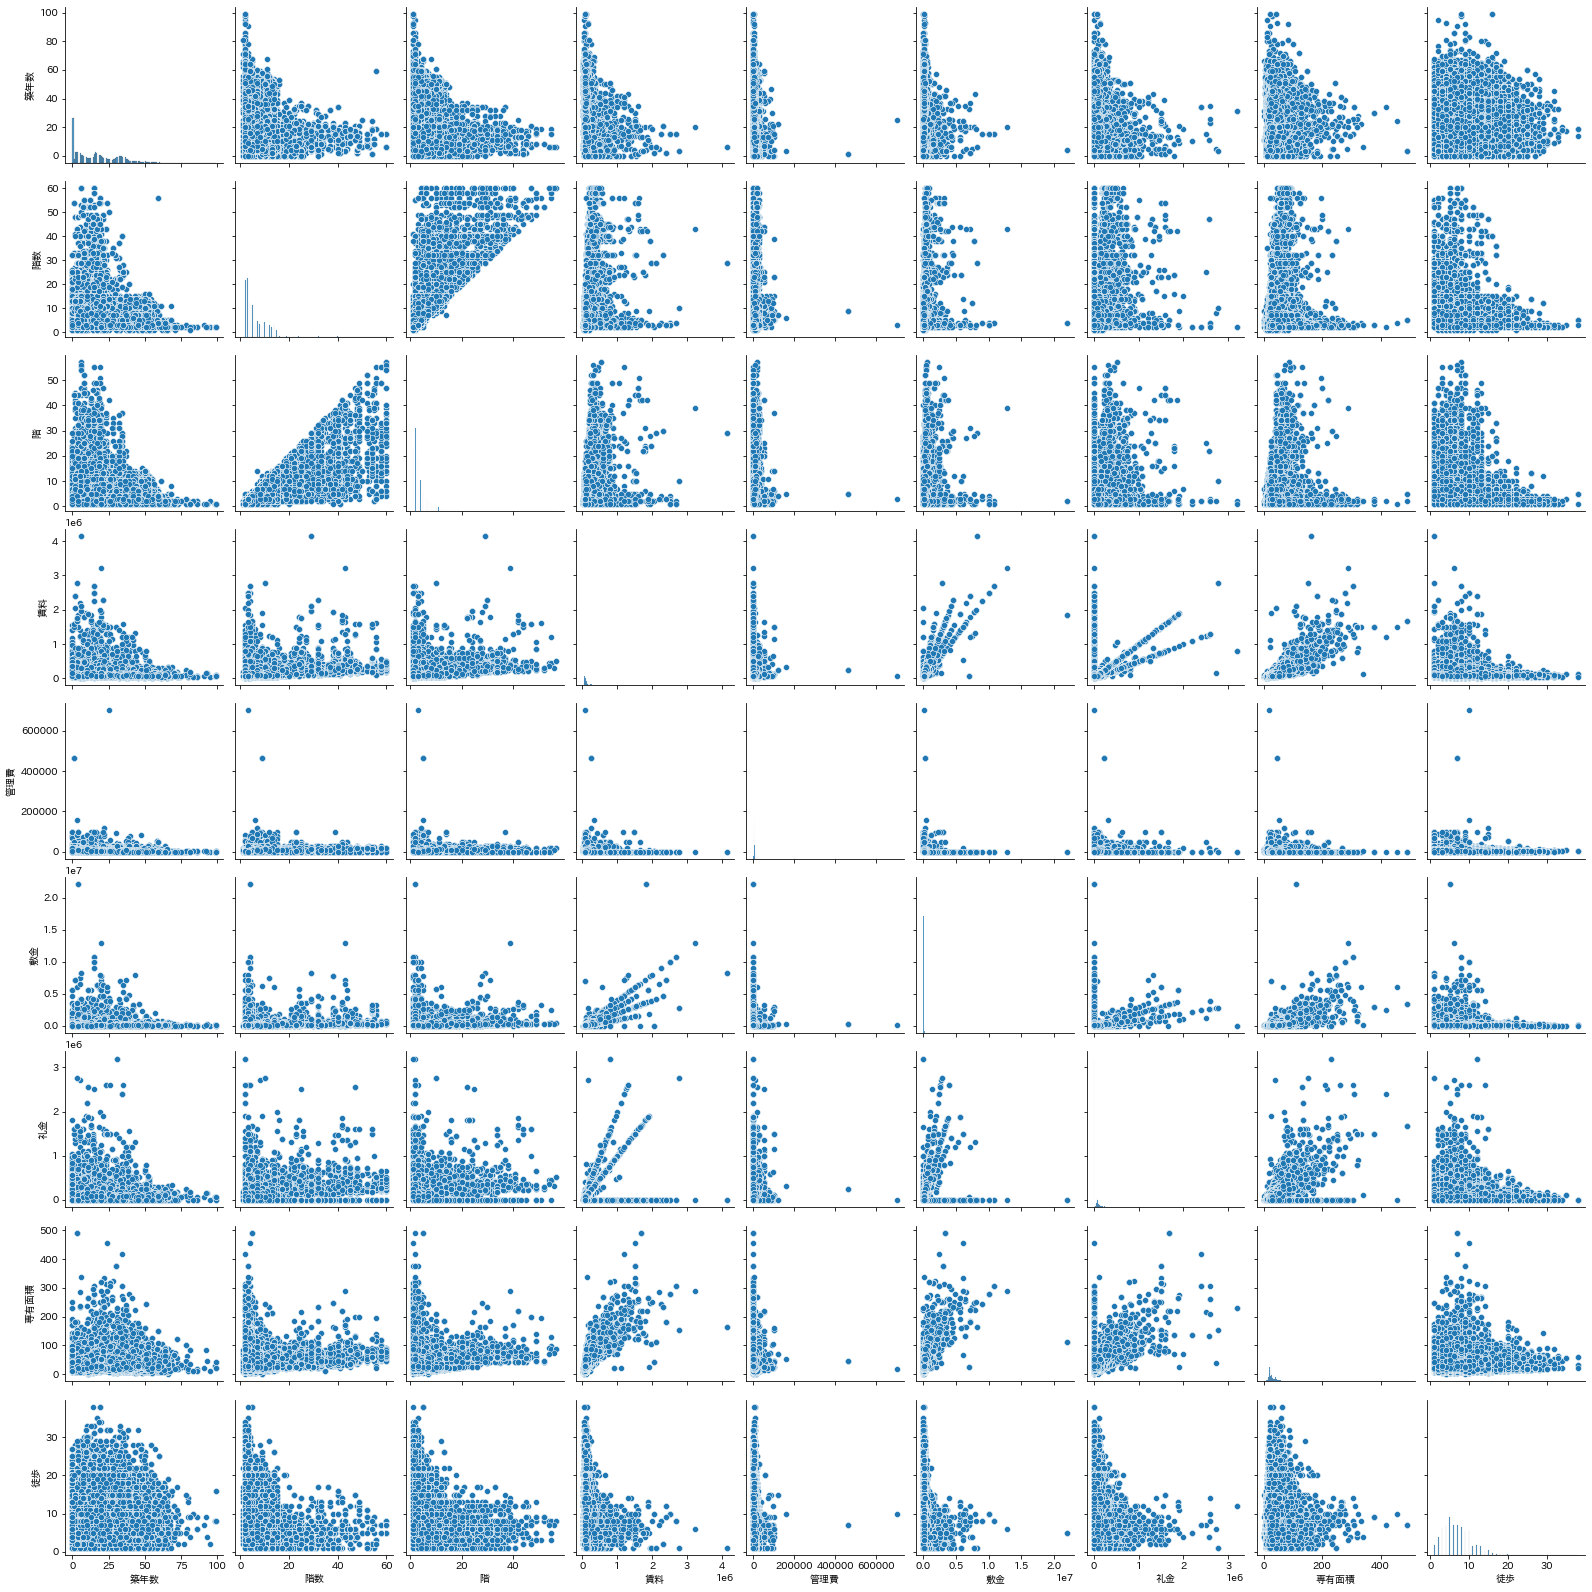

In [7]:
'''
ペアプロット
'''

sns.pairplot(df)
plt.show()

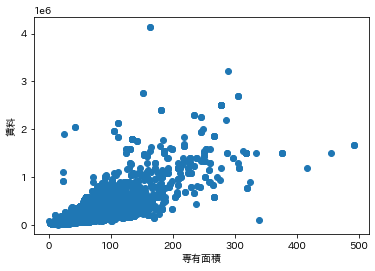

In [9]:
"""
面積と賃料
"""

plt.scatter(df['専有面積'], df['賃料'])
plt.xlabel('専有面積')
plt.ylabel('賃料')
plt.show()

面積が広い部屋ほど、賃料が高くなる

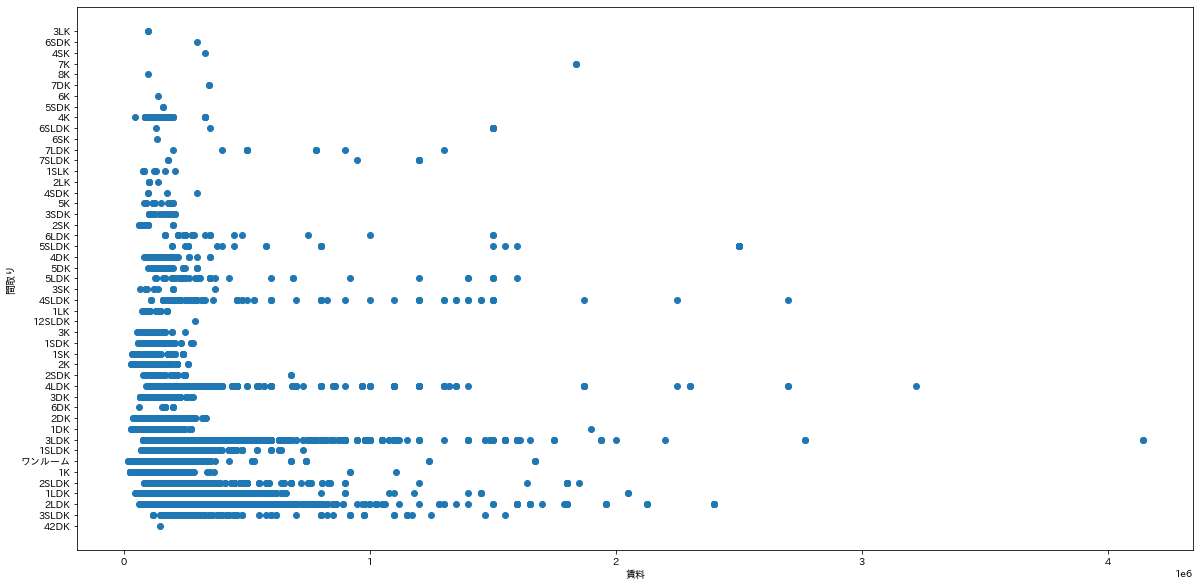

In [16]:
'''
間取りと賃料
'''
plt.figure(figsize=(20,10))
plt.scatter(df['賃料'], df['間取り'])
plt.xlabel('賃料')
plt.ylabel('間取り')

plt.show()

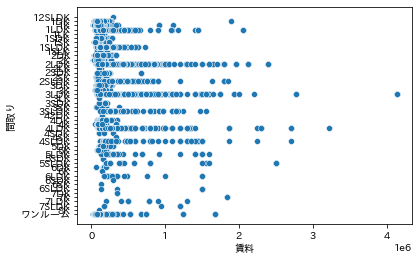

In [14]:
sns.scatterplot(x='賃料', y='間取り', data=df, legend=False)
plt.show()

部屋が多いと、賃料が高い

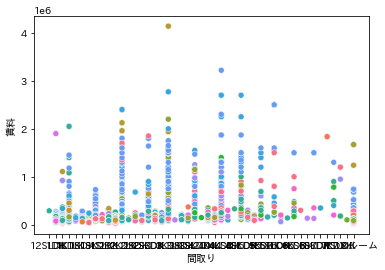

In [17]:
sns.scatterplot(x='間取り', y='賃料', hue='23区', data=df, legend=False)
plt.show()

In [29]:
df['23区'].value_counts()

世田谷区    14499
大田区     14354
品川区     13118
板橋区     12508
杉並区     11822
練馬区     11371
足立区     11108
江東区     10538
中野区     10473
江戸川区    10284
新宿区     10252
豊島区      9610
港区       9416
台東区      8993
北区       8844
目黒区      8688
葛飾区      8506
渋谷区      8438
墨田区      8268
文京区      7114
中央区      6702
荒川区      4883
千代田区     3134
Name: 23区, dtype: int64

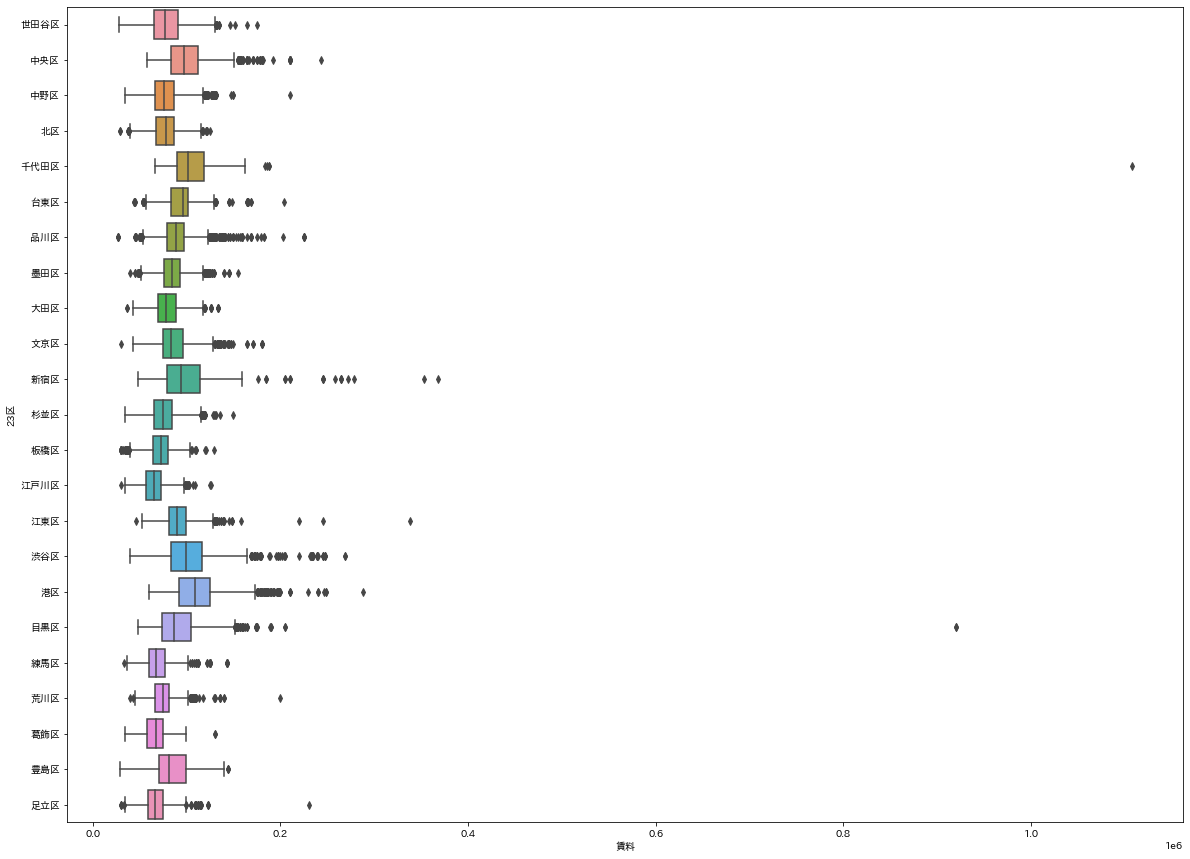

In [52]:
#23区の賃料の箱ひげ図
plt.figure(figsize=(20,15))
sns.boxplot(x='賃料', y='23区', data=df[df['間取り']=='1K'], sym='')
plt.show()

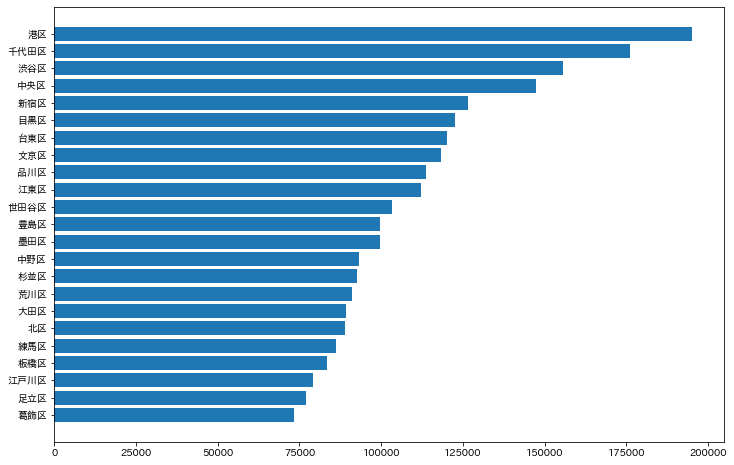

In [80]:
#23区別賃料平均の棒グラフ
_price_mean=df['賃料'].groupby(by=df['23区']).mean().sort_values(ascending=True)
_y=_price_mean.keys()
_width=_price_mean.values

plt.figure(figsize=(12,8))
plt.barh(y=_y, width=_width)
plt.show()

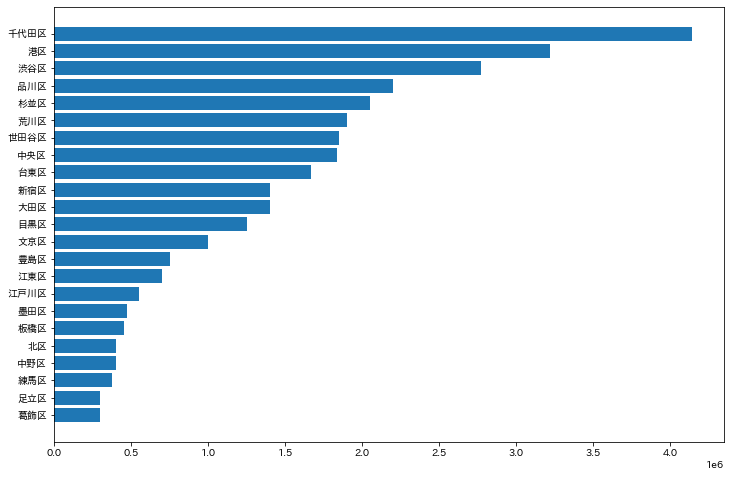

In [79]:
#23区別賃料最高の棒グラフ
_price_max=df['賃料'].groupby(by=df['23区']).max().sort_values(ascending=True)
_y=_price_max.keys()
_width=_price_max.values

plt.figure(figsize=(12,8))
plt.barh(y=_y, width=_width)
plt.show()

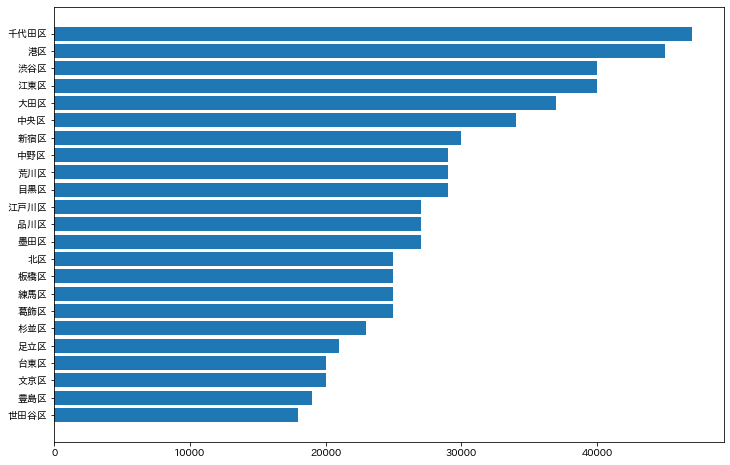

In [82]:
#23区別賃料最低の棒グラフ
_price_min=df['賃料'].groupby(by=df['23区']).min().sort_values(ascending=True)
_y=_price_min.keys()
_width=_price_min.values

plt.figure(figsize=(12,8))
plt.barh(y=_y, width=_width)
plt.show()

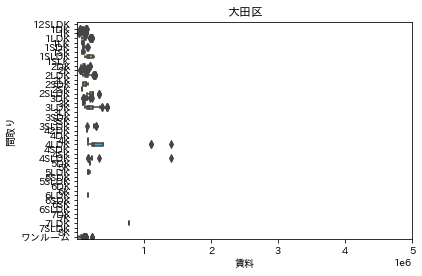

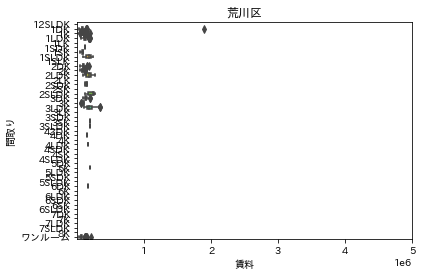

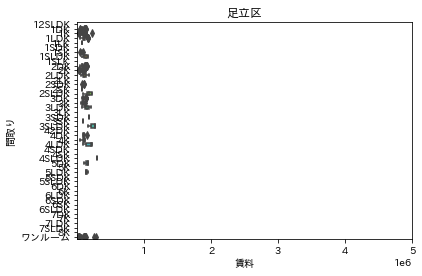

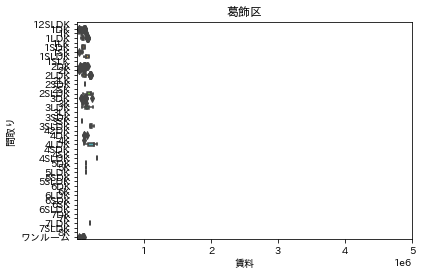

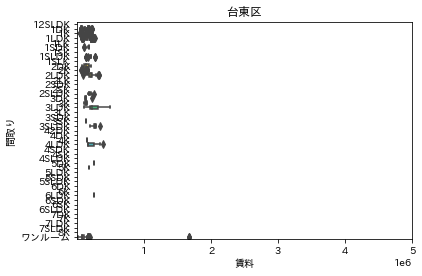

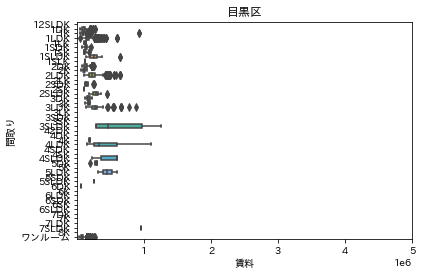

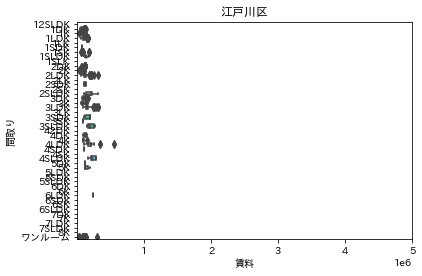

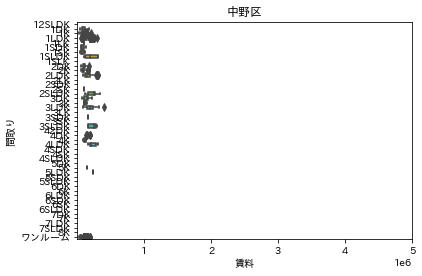

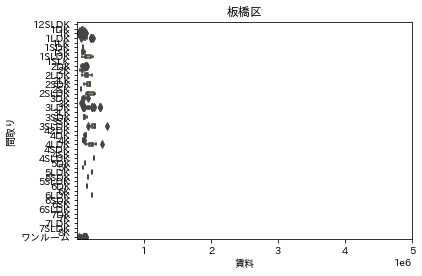

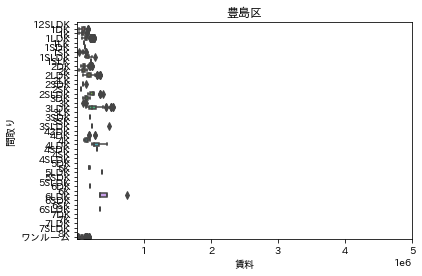

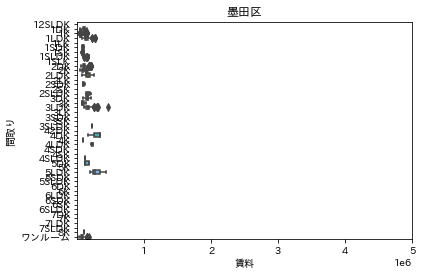

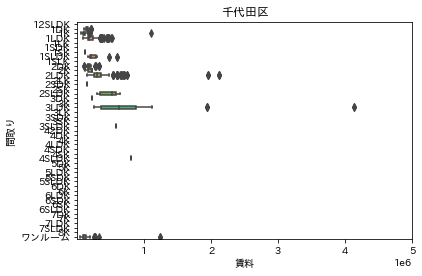

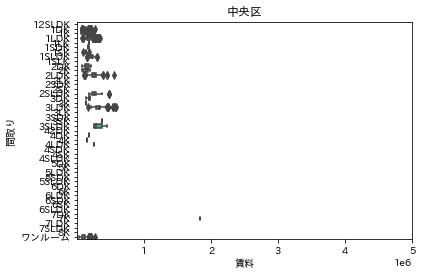

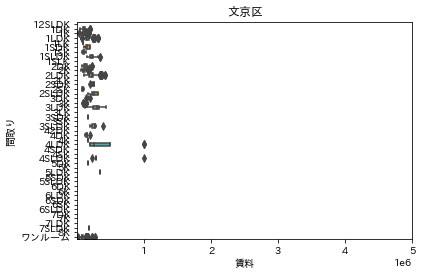

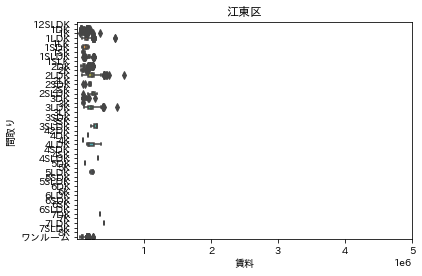

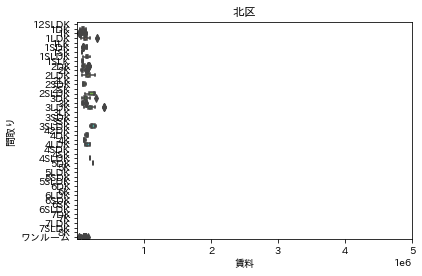

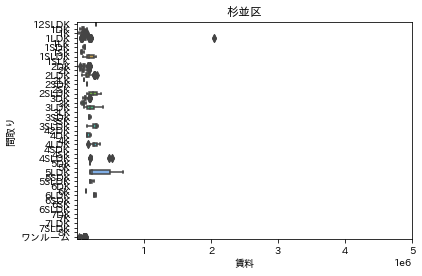

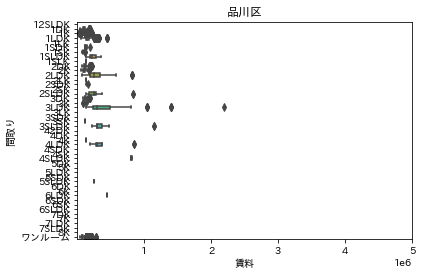

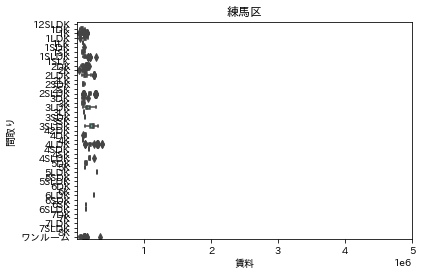

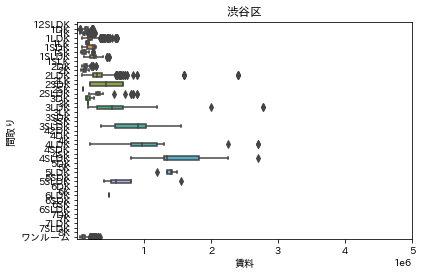

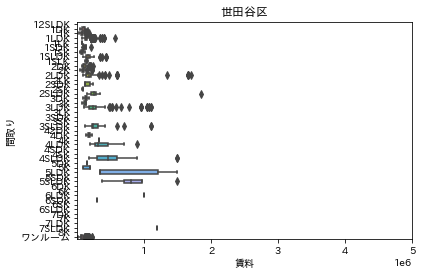

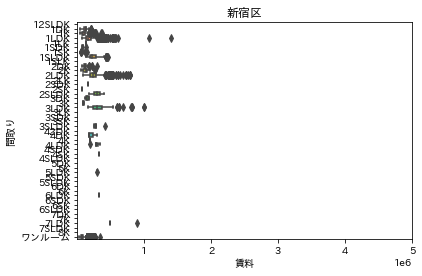

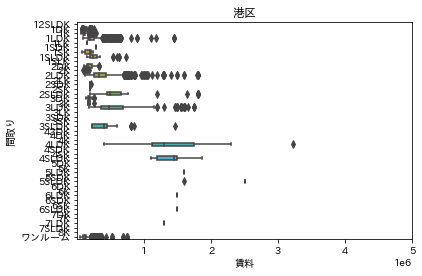

In [48]:
'''
23区ごとの間取り別賃料の箱ひげ図
'''

wards=df['23区'].unique()
# plt.figure(figsize=(12,8))

for ward in wards:
    plt.title(f'{ward}')
    sns.boxplot(x='賃料', y='間取り', data=df[df['23区']==ward])
    plt.xlim(5000, 5000000)
    plt.show()


目黒区、千代田区、江東区はばらつきが大きく、賃料は高め 

都心から離れた場所では上記の逆

中央区、千代田区、江東区、目黒区は高い 

都心へのアクセスがいい部屋は高い傾向にある

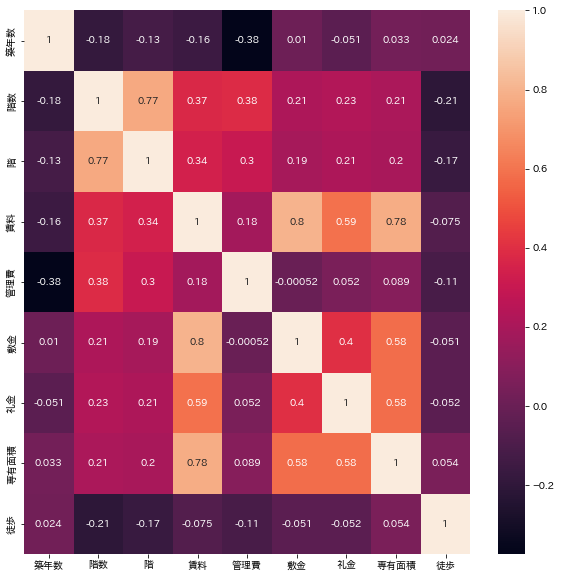

In [83]:
'''
各特徴量間の相関係数の確認
'''

plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True)
plt.show()

## 賃料が高い部屋の特徴 
敷金、礼金が高い 

面積が広い 

階数が高い 

23区のうち都心部、もしくは都心に近い 

部屋が多い間取り 

主要路線の駅に近い（イメージ）

### →予測に大きく影響しそう

In [84]:
#部屋の階数が高いと面積は広いのか
df[['専有面積','階']].corr()

,専有面積,階
専有面積,1.000000,0.195282
階,0.195282,1.000000


In [149]:
df[(df['階']==df['階数']) & (df['階']>50)]['間取り'].value_counts()

1LDK      7
12SLDK    0
6DK       0
4LDK      0
4SDK      0
4SK       0
4SLDK     0
5DK       0
5K        0
5LDK      0
5SDK      0
5SLDK     0
6K        0
4DK       0
6LDK      0
6SDK      0
6SK       0
6SLDK     0
7DK       0
7K        0
7LDK      0
7SLDK     0
8K        0
4K        0
42DK      0
1DK       0
3SLDK     0
1K        0
1LK       0
1SDK      0
1SK       0
1SLDK     0
1SLK      0
2DK       0
2K        0
2LDK      0
2LK       0
2SDK      0
2SK       0
2SLDK     0
3DK       0
3K        0
3LDK      0
3LK       0
3SDK      0
3SK       0
ワンルーム     0
Name: 間取り, dtype: int64

In [152]:
_df[(_df['階']==_df['階数']) & (_df['階']>50)]

,カテゴリ,建物名,築年数,階数,階,賃料,管理費,敷金,礼金,間取り,専有面積,23区,都市名,路線,最寄駅,徒歩
36637,賃貸マンション,都営大江戸線 勝どき駅 地下1地上52階建 築8年,8,52,52,250000.0,15000.0,250000.0,250000.0,1LDK,42.88,中央区,晴海３,都営大江戸線,勝どき駅,8
36642,賃貸マンション,都営大江戸線 勝どき駅 地下1地上52階建 築8年,8,52,52,297000.0,0.0,297000.0,297000.0,1LDK,46.45,中央区,晴海３,都営大江戸線,勝どき駅,8
36643,賃貸マンション,都営大江戸線 勝どき駅 地下1地上52階建 築8年,8,52,52,297000.0,0.0,297000.0,297000.0,1LDK,46.45,中央区,晴海３,都営大江戸線,勝どき駅,8
89087,賃貸マンション,都営大江戸線 勝どき駅 52階建 築8年,8,52,52,250000.0,15000.0,250000.0,250000.0,1LDK,42.88,中央区,晴海３,都営大江戸線,勝どき駅,9
89289,賃貸マンション,都営大江戸線 勝どき駅 52階建 築8年,8,52,52,250000.0,15000.0,250000.0,250000.0,1LDK,42.88,中央区,晴海３,都営大江戸線,勝どき駅,9
109977,賃貸マンション,都営大江戸線 勝どき駅 52階建 築8年,8,52,52,297000.0,0.0,297000.0,297000.0,1LDK,46.45,中央区,晴海３,都営大江戸線,勝どき駅,9
110068,賃貸マンション,都営大江戸線 勝どき駅 52階建 築8年,8,52,52,297000.0,0.0,297000.0,297000.0,1LDK,46.45,中央区,晴海３,都営大江戸線,勝どき駅,9


管理費はオーナーが決めているので、賃料に含めて予測をおこなうと良い

敷金・礼金は初期費用という目的変数 

レコメンドシステムで金額を項目に含めないほうがいい→敷金・礼金は含めない（最終的な目的次第） 

SUUMOで実際に賃貸を検索する時の条件を説明変数にするのが良い 

金額情報；年間費用、初期費用（敷金・礼金）、 

賃料の許容範囲を考慮したレコメンド, 許容範囲は機械学習（交差エントロピー損失） 

例：設定金額10万(範囲指定せずにピンポイントもあり？) 
i)10万以下　罰則なし→おすすめできる 
ii) 10万超え　超えている分だけ罰則を与える→おすすめできない 

おすすめできるか否かを判断するポイントの調査が必要 

awsで毎日スクレイピング 

掲載期間を人気度の指標とすることはほぼ不可能 



================================= 

### 重視したい項目の優先順位をつける 

用途を選択するプルダウンメニューを作成 

第１１３条 建物の種類は、建物の主な用途により、居宅、店舗、寄宿第１１３条 建物の種類は、建物の主な用途により、居宅、店舗、寄宿舎、共同住宅、事務所、旅館、料理店、工場、倉庫、車庫、発電所及び変電所に区分して定め、これらの区分に該当しない建物については、これに準じて定めるものとする。舎、共同住宅、事務所、旅館、料理店、工場、倉庫、車庫、発電所及び変電所に区分して定め、これらの区分に該当しない建物については、これに準じて定めるものとする。
